In [2]:
from unityagents import UnityEnvironment
from ddpg_agent import *
import matplotlib.pyplot as plt
%matplotlib inline

# Define the environment

In [3]:
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64') 
brain_name = env.brain_names[0] # get the default brain
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
agents_number = len(env_info.agents) # number of agents
action_size = brain.vector_action_space_size # size of each action
states = env_info.vector_observations # examine the state space
state_size = states.shape[1]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


# DDPG- algorithm

In [5]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=42, replicates = agents_number)

In [6]:
def ddpg(n_episodes=1000, max_t=1000, goal_score=30, interval=100):
    
    """Deep Deterministic Policy Gradients DDPG  from Pendulum exercise was employed: 
       Params:
            n_episodes (int): maximum number of training episodes
            max_t (int): maximum number of timesteps per episode
    """
    
    avg_scores_deque = deque(maxlen=interval)
    avg_scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset() 
        scores = np.zeros(agents_number) 
        
        for t in range(max_t):
            
            actions = agent.act(states) 
            action_info = env.step(actions)[brain_name] 
            next_states = action_info.vector_observations
            rewards = action_info.rewards
            dones = action_info.local_done
            agent.step(t, states, actions, rewards, next_states, dones)
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
        
        avg_scores_deque.append(np.mean(scores))
        avg_scores.append(np.mean(scores)) 
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(avg_scores_deque)), end="\n")   
        torch.save(agent.actor_local.state_dict(),  'checkpoint_actor.pth' )
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if (i_episode > interval-1) & (np.mean(avg_scores_deque) >= goal_score):
            print('\nEnvironment solved!')
            break
            
    return avg_scores

In [7]:
avg_scores = ddpg()

Episode 1	Average Score: 0.51
Episode 2	Average Score: 0.62
Episode 3	Average Score: 0.66
Episode 4	Average Score: 0.66
Episode 5	Average Score: 0.68
Episode 6	Average Score: 0.69
Episode 7	Average Score: 0.69
Episode 8	Average Score: 0.68
Episode 9	Average Score: 0.69
Episode 10	Average Score: 0.69
Episode 11	Average Score: 0.70
Episode 12	Average Score: 0.71
Episode 13	Average Score: 0.72
Episode 14	Average Score: 0.75
Episode 15	Average Score: 0.79
Episode 16	Average Score: 0.82
Episode 17	Average Score: 0.80
Episode 18	Average Score: 0.81
Episode 19	Average Score: 0.81
Episode 20	Average Score: 0.83
Episode 21	Average Score: 0.83
Episode 22	Average Score: 0.85
Episode 23	Average Score: 0.87
Episode 24	Average Score: 0.90
Episode 25	Average Score: 0.93
Episode 26	Average Score: 0.95
Episode 27	Average Score: 0.97
Episode 28	Average Score: 0.99
Episode 29	Average Score: 1.00
Episode 30	Average Score: 1.02
Episode 31	Average Score: 1.05
Episode 32	Average Score: 1.07
Episode 33	Averag

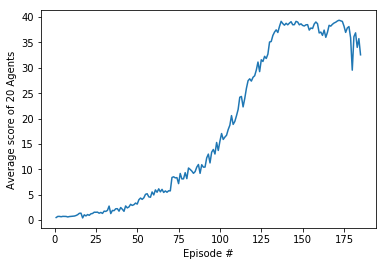

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(avg_scores)+1), avg_scores)
plt.ylabel('Average score of {} Agents'.format(agents_number))
plt.xlabel('Episode #')
plt.show()